# GRAFICO DE EQUILIBRIO DE FASES: "2-PROPANOL + 1-PENTANOL" ECUACION NTRL

## Descripción General¶
Este proyecto calcula y grafica el equilibrio de fases del sistema binario 2-Propanol + 1-Pentanol utilizando la ecuación de NTRL (Non-Random Two-Liquid) para modelar los coeficientes de actividad. Se utilizan las ecuaciones de Antoine para calcular la presión de vapor de los componentes a diferentes fracciones molares y temperaturas.

## Importación de Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Definición de Datos Experimentales y Constantes

### Datos Experimentales

In [2]:
Tem_exp = np.array([411.10, 408.68, 406.51, 404.91, 402.10, 400.42, 398.32, 395.97, 392.48, 390.25, 388.14, 385.00, 383.55, 380.36, 379.45, 377.00, 374.75, 372.45, 371.03, 367.88, 366.57, 363.69, 361.67, 359.47, 357.45, 355.50])
x1_exp = np.array([0, 0.0156, 0.0315, 0.0495, 0.0682, 0.0854, 0.1016, 0.1250, 0.1615, 0.1895, 0.2141, 0.2579, 0.2794, 0.3302, 0.3494, 0.3956, 0.4364, 0.4821, 0.5105, 0.5908, 0.628, 0.7059, 0.7645, 0.8324, 0.9032, 0.999999])
y1_exp = np.array([0, 0.0741, 0.1499, 0.2355, 0.2973, 0.3565, 0.4056, 0.4684, 0.5509, 0.6088, 0.6498, 0.7155, 0.7398, 0.7905, 0.8072, 0.8405, 0.8644, 0.8861, 0.8990, 0.9275, 0.9385, 0.9573, 0.9685, 0.9798, 0.9895, 0.999999])

### Constantes de los Componentes

In [3]:
c_2_propanol = {"A": 6.40823, "B": 1107.303, "C": -103.944, "Te": 355.65}
c_1_pentanol = {"A": 6.3975, "B": 1337.613, "C": -106.567, "Te": 411.15}

## Funciones y Cálculos

### Función de Antoine
Esta función calcula la presión de vapor de un componente en función de la temperatura utilizando la ecuación de Antoine. La temperatura (T) debe ingresarse en grados Celsius (°C), y la presión de vapor resultante se obtiene en milímetros de mercurio (mmHg).

In [4]:
def Antoine(T, A, B, C):
    log = A - B / (T + C)
    anto = 10**log
    return anto

### Parámetros Iniciales y Cálculo de Equilibrio

In [5]:
# Asignación de componentes y generación de fracciones molares.
Comp1 = c_2_propanol
Comp2 = c_1_pentanol
x1 = x1_exp
x2 = 1 - x1

# Parámetros de interacción binaria para el modelo NRTL (Non-Random Two-Liquid).
Cons_NRTL = {"A12": -1966.54, "A21": 1905.90, "alfa": 0.3}
R = 8.314472  # Constante de los gases en J/(mol*K)
Pc = 101.3  # Presión total en kPa

# Cálculo iterativo de la temperatura de equilibrio
Te_te = np.zeros_like(x1_exp)
Te = Comp1["Te"]
for j, x11 in enumerate(x1_exp):
    x21 = 1 - x11
    for _ in range(10000):
        # Cálculo de las energías de interacción entre los componentes y los factores de no aleatoriedad.
        tau12 = Cons_NRTL["A12"] / (R * Te)
        tau21 = Cons_NRTL["A21"] / (R * Te)
        G12 = np.exp(-Cons_NRTL["alfa"] * tau12)
        G21 = np.exp(-Cons_NRTL["alfa"] * tau21)
        
        # Cálculo de los coeficientes de actividad usando el modelo NRTL.
        ga1 = tau21 * (G21 / (x11 + x21 * G21))**2 + tau12 * G12 / (x21 + x11 * G12)**2
        gama1 = np.exp((x21**2) * ga1)
        ga2 = tau12 * (G12 / (x21 + x11 * G12))**2 + tau21 * G21 / (x11 + x21 * G21)**2
        gama2 = np.exp((x11**2) * ga2)
        
        # Cálculo de la presión de vapor utilizando la ecuación de Antoine.
        Pvp_1 = Antoine(Te, Comp1["A"], Comp1["B"], Comp1["C"])
        Pvp_2 = Antoine(Te, Comp2["A"], Comp2["B"], Comp2["C"])
        
        # Cálculo de las fracciones molares en la fase vapor.
        y1 = gama1 * Pvp_1 * x11 / Pc
        y2 = gama2 * Pvp_2 * x21 / Pc
        a = y1 + y2
        b = abs(1 - a)
        
        # Verificación de la condición de equilibrio.
        if b <= 0.001:
            Te_te[j] = Te
            break
        Te += 0.05
    Te = Comp1["Te"] - 5

### Cálculo de Pvp y Coeficientes de Actividad

In [6]:
# Cálculo de presión de vapor de los componentes usando la ecuación de Antoine.
Pvp_1 = Antoine(Te_te, Comp1["A"], Comp1["B"], Comp1["C"])
Pvp_2 = Antoine(Te_te, Comp2["A"], Comp2["B"], Comp2["C"])

# Cálculo de las energías de interacción y coeficientes de actividad usando las temperaturas de equilibrio obtenidas.
tau12 = Cons_NRTL["A12"] / (R * Te_te)
tau21 = Cons_NRTL["A21"] / (R * Te_te)
G12 = np.exp(-Cons_NRTL["alfa"] * tau12)
G21 = np.exp(-Cons_NRTL["alfa"] * tau21)
ga1 = tau21 * (G21 / (x1 + x2 * G21))**2 + tau12 * G12 / (x2 + x1 * G12)**2
gama1 = np.exp((x2**2) * ga1)
ga2 = tau12 * (G12 / (x2 + x1 * G12))**2 + tau21 * G21 / (x1 + x2 * G21)**2
gama2 = np.exp((x1**2) * ga2)

# Cálculo de las fracciones molares en la fase vapor.
y1 = gama1 * Pvp_1 * x1 / Pc
y2 = gama2 * Pvp_2 * x2 / Pc

## Visualización de Resultados

### Gráfico 1: Fracción Molar vs $y_1$

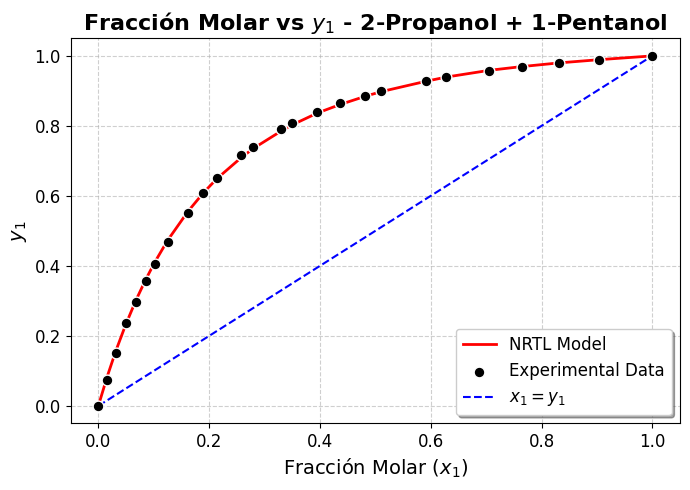

In [7]:
plt.figure(figsize=(7, 5))
plt.plot(x1, y1, color='red', linestyle='-', linewidth=2, label='NRTL Model')
plt.scatter(x1_exp, y1_exp, color='black', edgecolors='white', s=60, zorder=5, label='Experimental Data')
plt.plot(x1, x1, color='blue', linestyle='--', linewidth=1.5, label='$x_1 = y_1$')
plt.title("Fracción Molar vs $y_1$ - 2-Propanol + 1-Pentanol", fontsize=16, fontweight='bold')
plt.xlabel("Fracción Molar ($x_1$)", fontsize=14)
plt.ylabel("$y_1$", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, frameon=True, loc='best', shadow=True, fancybox=True)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Gráfico 2: Fracción Molar vs Temperatura

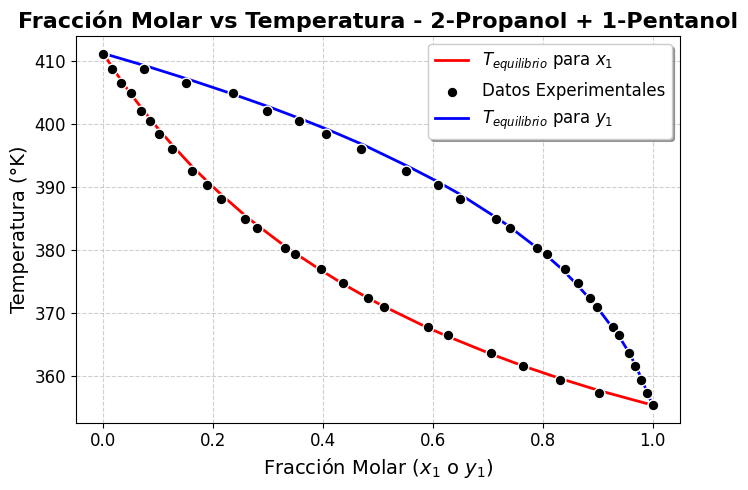

In [8]:
plt.figure(figsize=(7, 5))
plt.plot(x1, Te_te, color='red', linestyle='-', linewidth=2, label='$T_{equilibrio}$ para $x_1$')
plt.scatter(x1_exp, Tem_exp, color='black', edgecolors='white', s=60, zorder=5, label='Datos Experimentales')
plt.plot(y1, Te_te, color='blue', linestyle='-', linewidth=2, label='$T_{equilibrio}$ para $y_1$')
plt.scatter(y1_exp, Tem_exp, color='black', edgecolors='white', s=60, zorder=5)
plt.title("Fracción Molar vs Temperatura - 2-Propanol + 1-Pentanol", fontsize=16, fontweight='bold')
plt.xlabel("Fracción Molar ($x_1$ o $y_1$)", fontsize=14)
plt.ylabel("Temperatura (°K)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, frameon=True, loc='best', shadow=True, fancybox=True)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Referencias

1. Los datos experimentales y los parámetros utilizados en este modelo fueron tomados del siguiente artículo: **Investigation on vapor–liquid equilibrium for 2-propanol + 1-butanol + 1-pentanol at 101.3 kPa**. 
